In [2]:
import sys
import os
# from matplotlib import pyplot as plt
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plot_fun import subplot_results
from utilities.matrix_calc import Jcb, calc_basis_matrix

### Settings

In [3]:
N = 4 # runs
Kx = [[2]] # Step
Kb = [[3]] # Polynomial
epochs = 100

J_cb = Jcb(*[calc_basis_matrix(x_basis=x, b_basis=b) for x, b in zip(Kx[0], Kb[0])])

In [4]:
s_on_f_model = ScalarOnFunctionModel(J_cb=J_cb)
optimizer_s_on_f = CordexContinuous(model=s_on_f_model)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(runs=N, nx=Kx[0], epochs=epochs, final_pass_iter=100)

100%|██████████| 100/100 [00:02<00:00, 49.92it/s]


Best objective value (A): 1.826459848878031e+16


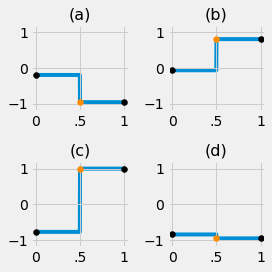

In [6]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')